### Задача:

Проанализируйте ассортимент товаров.

- Проведите исследовательский анализ данных;
- Проанализируйте торговый ассортимент;
- Сформулируйте и проверьте статистические гипотезы.

(задачи выше сформулированы предварительно, окончательная постановка задачи произойдёт на вводной встрече)

### Описание данных:

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

<h2> Открыть датасет и изучить  общую информацию </h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as plt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/ecommerce_dataset.csv')

In [3]:
pd.set_option('display.max_columns', None)
#Установим ширину ячеек
pd.set_option("max_colwidth", 999)

In [4]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


<h2> Подготовить данные </h2>

Переведем столб 'date' в формат datetime

In [6]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB


Остальные форматы можно оставить как есть.

In [8]:
print(f'Сумма дубликатов: {data.duplicated().sum()}')

Сумма дубликатов: 0


Поссмотрим кол-во на id транзакций.

In [9]:
data.groupby('order_id').agg({'product': 'count'}).sort_values(by = 'product',ascending = False)

,product
order_id,
14833,888
14835,203
14753,90
14897,63
70960,60
...,...
70128,1
70126,1
70125,1


Интересно посмотреть на покупки по индефикатору "14833", их подозрительно много за всего лишь 1 год.

In [10]:
data.query('order_id == 14833').sort_values(by = 'price', ascending = False)

,date,customer_id,order_id,product,quantity,price
5544,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт,1,210.0
5317,2019-06-14 18:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт,1,210.0
5058,2019-06-10 22:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт,1,210.0
5455,2019-06-18 13:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт,1,210.0
4933,2019-06-09 10:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт,1,210.0
...,...,...,...,...,...,...
4717,2019-06-06 13:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0
4718,2019-06-06 13:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0
4719,2019-06-06 13:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",1,120.0
4720,2019-06-06 13:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Зебра кассета 6 шт E6,1,120.0


Подозрително, что одни и теже транзакции осуществляются с разницей в несколько часов. Посмотрим на то, сколько строк дубликатов без учета даты.

In [11]:
data.query('order_id == 14833')[['customer_id','order_id','product','quantity','price']].duplicated().sum()

864

Возможно это ошибка системы выгрузки. Данные семплируются, иначе бы customer_id отличался. Эти дубликаты стоит удалить, так как они искажают результаты исследования.

In [12]:
dupli = data[['customer_id','order_id','product','quantity','price']].duplicated().sum()

In [13]:
print(f'Неявных дублткатов в датасете {dupli}')

Неявных дублткатов в датасете 1864


Удалим дубликаты без учета даты.

In [14]:
data = data[~data[['customer_id','order_id','product','quantity','price']].duplicated()]

<h2> Изучить подготовленные данные </h2>

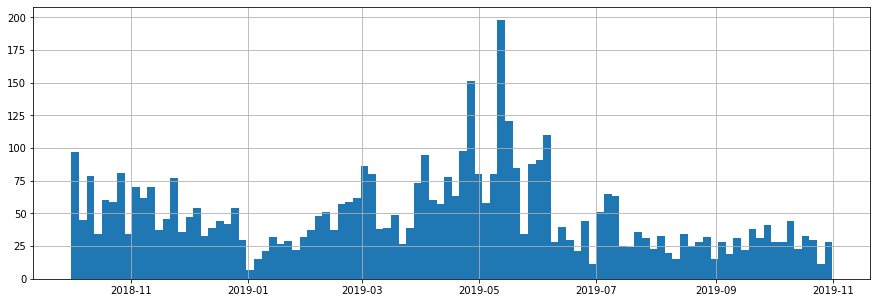

In [15]:
data.date.hist(figsize=(15,5), bins =100);

In [16]:
print(f'Первая дата покупки в датасете:{data.date.min()} и последняя дата: {data.date.max()}')

Первая дата покупки в датасете:2018-10-01 00:00:00 и последняя дата: 2019-10-31 14:00:00


Проверим выбросы в колоке "price"

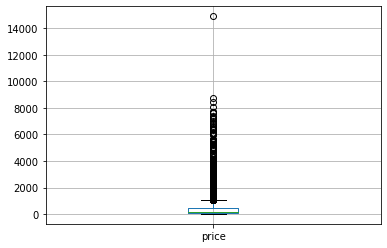

In [17]:
data.boxplot(column=['price']);

Проверим выбросы в колоке "quantity"

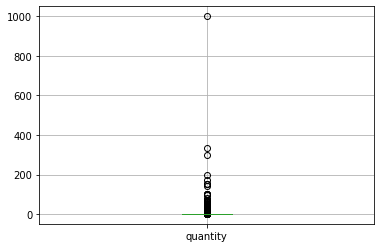

In [18]:
data.boxplot(column=['quantity']);

Посмотрим на сроки с аномальными значениями по ближе.

In [19]:
len(data)

4873

In [20]:
data = data.query('quantity != 1000')

In [21]:
data.query('quantity == 1000')

,date,customer_id,order_id,product,quantity,price


In [22]:
data.query('price > 14000')

,date,customer_id,order_id,product,quantity,price
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917.0


Стоимость сушилки не является аномалией, а опт в заказае в размере 1000 единиц, способен исказить наше исследование, уберем это.

Посмотрим на квантили у количественных величин.

In [23]:
data.describe()

,order_id,quantity,price
count,4872.000000,4872.000000,4872.000000
mean,48226.461617,2.632800,514.716954
std,27342.080544,10.290206,944.549630
min,12624.000000,1.000000,9.000000
25%,14775.500000,1.000000,90.000000
50%,68860.000000,1.000000,150.000000
75%,70832.250000,1.000000,488.000000
max,73164.000000,334.000000,14917.000000


75% всех транзакций имеют кол-во в 1 единицу и  стоимость не более 398 у.е

Посмотрим на уникальных пользователей и заказы.

In [24]:
print(f'Кол-во уникальных пользователей: {len(data.customer_id.unique())}')

Кол-во уникальных пользователей: 2450


In [25]:
print(f'Кол-во уникальных транзакций: {len(data.order_id.unique())}')

Кол-во уникальных транзакций: 2783


Почти в двое меньше, чем общее кол-во записей в датасете.

In [26]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Создадим отдельный столбец с порядковым номером месяца

In [27]:
data['month'] = pd.DatetimeIndex(data['date']).month

Cоздадим отдельный столбец, в котором будет выявлена общая выручка

In [28]:
data['revenue'] = data['price']*data['quantity']

<h2> Кластеризация категорий продукта </h2>

Идея кластеризации категорий будет состоять из:
- Создаем отдельную колонку, в котором функция возвращает первое слово наименования продукции;
- По ключевому слову определяем топ частовстречаемых наименований;
- Вручную создаем словари и кластеризуем категории;
- Все, что не попадает под топ запросов, присваимваем категорию "другое";

In [29]:
# создаем функцию, которая принимает в качестве аргумента яцейку с продукцией и возвращает первое слово. 
def str_value(x):
    return " ".join(x.split()[:1])

In [30]:
# создаем колнку "ключевое слово", по которой уже потом будет кластеризовывать продукцию
data['key_word'] = data['product'].apply(str_value).str.lower()

In [31]:
group_key = data.groupby('key_word').agg({'order_id':'count'}).sort_values(by = 'order_id', ascending = False)

In [32]:
group_key.head()

,order_id
key_word,
пеларгония,708
рассада,478
сушилка,277
сумка-тележка,235
муляж,177


Теперь придется затронуть ручной способ сортировки.

In [33]:
print(f'Первые {40} товаров из списака составляют {round(group_key.head(40).sum()/group_key.sum()*100)[0]} % всего наименования')

Первые 40 товаров из списака составляют 74.0 % всего наименования


In [34]:
print(f'Если увеличим кол-во первых товаров из списака до {60}, то можем увижеть что они составляют {round(group_key.head(60).sum()/group_key.sum()*100)[0]} % всего наименования')

Если увеличим кол-во первых товаров из списака до 60, то можем увижеть что они составляют 79.0 % всего наименования


In [35]:
print(f'Если увеличим кол-во первых товаров из списака до {70}, то можем увижеть что они составляют {round(group_key.head(70).sum()/group_key.sum()*100)[0]} % всего наименования')

Если увеличим кол-во первых товаров из списака до 70, то можем увижеть что они составляют 81.0 % всего наименования


Всего 1 % , а разница в 10 исследуемых строк. Аналитики ценят свое время и время компании, поэтому 60 первых слов нас вполне устроит. 

In [36]:
group_key.head(60)

,order_id
key_word,
пеларгония,708
рассада,478
сушилка,277
сумка-тележка,235
муляж,177
томата,142
петуния,141
гладильная,119
герань,110


Зададим основные категории:

In [37]:
#Категория растения
plants = ['рассада','пеларгония','петуния','томата','герань','калибрахоа','бакопа',
               'тагетис','однолетнее','роза','вербена','базилик','дыня',
              'лобелия','мята','эвкалипт','подвесное','фуксия','декабрист','флокс','примула','циперус','комнатное',
         'арбуз','фиалка','цикламен','спатифиллум','гвоздика','эхинокактус','эпипремнум','тюльпан']

#Категория искусственные растения и фрукты
artificial_flower = ['цветок','искусственный','искусственная','муляж']

#Категория для дома
for_house = ['коврик','штора','вешалка','полки','термометр','карниз','новогоднее','декоративная','комод','вешалки','плечики',
            'крючок','вешалка-плечики','простынь']

#Категория для кухни
for_kithen = ['тарелка','набор','скатерть','салатник','щетка','банка','кружка','чайник',
              'контейнер','подкладка','нож','салфетка','вилка','ложка','кувшин', 'кстрюля','столовый','губка',
             'венчик','мини-сковорода','картофелемялка','сито','миксер','универсальный','нетканые','половник','сервировочная']
#Категория Хозяйственные товары и интсрументы
for_farm_and_tools = ['сумка-тележка','тележка','стремянка','сумка','лестница-стремянка','сушилка','гладильная',
           'чехол','таз','швабра','ёрш','корзина','ящик','мыло','лестница','щётка','ерш','вантуз','ручка-скоба',
                     'крепеж', 'пружина','шпингалет','насадка','стяжка','ковш','петля','ведро','щетка-сметка','уголок',
                      'завертка','веник','штангенциркуль']

In [38]:
# ручной поиск, для уточнения продукции (полного названия)
data.query('key_word == "штангенциркуль"')

,date,customer_id,order_id,product,quantity,price,month,revenue,key_word
2197,2019-03-05 16:00:00,36f7f71c-80ca-4e6c-afd0-399fcffcb59e,70615,"Штангенциркуль 150 мм пластмассовый, точность 0,1 мм 3015515, 0910007",15,32.0,3,480.0,штангенциркуль


После того, как словарь готов, мы создаем колонку с категориями в которых делаем распределение по ключевому слову.

In [39]:
data['category'] = 'другое'

In [40]:
data.loc[data.query('key_word in @plants').index, 'category'] = 'растения'
data.loc[data.query('key_word in @artificial_flower').index, 'category'] = 'искусственные растения и фрукты'
data.loc[data.query('key_word in @for_house').index, 'category'] = 'товары для дома'
data.loc[data.query('key_word in @for_kithen').index, 'category'] = 'товары для кухни'
data.loc[data.query('key_word in @for_farm_and_tools').index, 'category'] = 'товары для хозяйства и стройки'

Можно рассмотреть детальнее, какие товары из категории "другое" можно отсортировать еще. Выберем топ 30 слов по количеству породукции в заказе.

In [41]:
data.query('category == "другое"').sort_values(by = 'quantity', ascending = False)['key_word'].unique()[:30]

array(['щетка-утюжок', 'фиксатор-шар', 'емкость', 'подарочный', 'ткань',
       'тимьян', 'наматрацник', 'вешалка-перекладина', 'кухонное',
       'отбеливатель', 'сметка', 'блюдце', 'стакан', 'вакуумный',
       'комплект', 'ранункулус', 'одеяло', 'дендробиум', 'кофр', 'циния',
       'модульная', 'чайная', 'цинния', 'жестяная', 'львиный', 'складная',
       'миска', 'хоста', 'бегония', 'эхеверия'], dtype=object)

In [42]:
total_category = data.groupby('category').agg({'order_id':'count'}).sort_values(by ='order_id',ascending = False)

In [43]:
total_category.columns = ['count']

In [44]:
total_category['ratio_%'] =  round(total_category['count'] / total_category['count'].sum(),4)*100

In [45]:
total_category

,count,ratio_%
category,,
растения,2051,42.10
товары для хозяйства и стройки,1064,21.84
другое,875,17.96
товары для дома,309,6.34
товары для кухни,294,6.03
искусственные растения и фрукты,279,5.73


Таким образом у нас получилось 6 категорий, на которые нам удалось кластеризировать продуктовый ассортимент.

85% процентов продукции отсортированно по категориями

<b>Вывод:</b> Нам удалось сегментировать категории продукции, за счет чего, будет проще провести анализ среди категориальных и количестивенных данных

<h2> Анализ продуктового ассортимента </h2>

Теперь приступим к изучению продуктового ассортимента, это поможет нам составить картину на спрос продуктовых категорий по времени года и доли общих продаж.

1. Построим общий график проданных категорий за все время

In [46]:
group_price = data.pivot_table(index = 'category', values = 'revenue', aggfunc = 'sum').sort_values(by = 'revenue', ascending = False).reset_index()

In [47]:
group_price.columns = ['category','revenue']

In [48]:
group_price

,category,revenue
0,товары для хозяйства и стройки,1586392.0
1,другое,576104.0
2,товары для дома,481597.0
3,растения,393525.0
4,товары для кухни,315986.0
5,искусственные растения и фрукты,113550.0


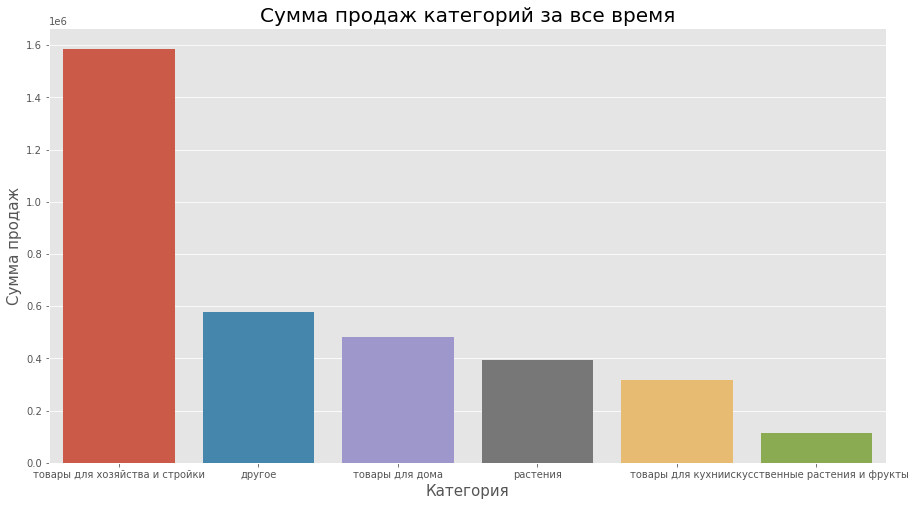

In [49]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(15,8))
    sns.barplot(data = group_price, x='category', y='revenue')
    plt.title('Сумма продаж категорий за все время', fontsize=20)
    plt.xlabel('Категория', fontsize = 15)
    plt.ylabel('Сумма продаж', fontsize = 15)

<b>Вывод:</b> Больше всего выруски принесла категория "товары для хозяйства и стройки", далее "другое", затем "товары для дома". Меньше всего принесла категория "искуственные растения и фрукты".

2. Построим график суммы продаж этих категорий по времени.

In [50]:
group_price_time = data.pivot_table(index = 'month', columns = 'category', values = 'revenue', aggfunc = 'sum').reset_index()

In [51]:
group_price_time.columns = ['month', 'other', 'artificial_flower', 'plants',
       'for_house', 'for_kithen', 'for_farm_and_tools']

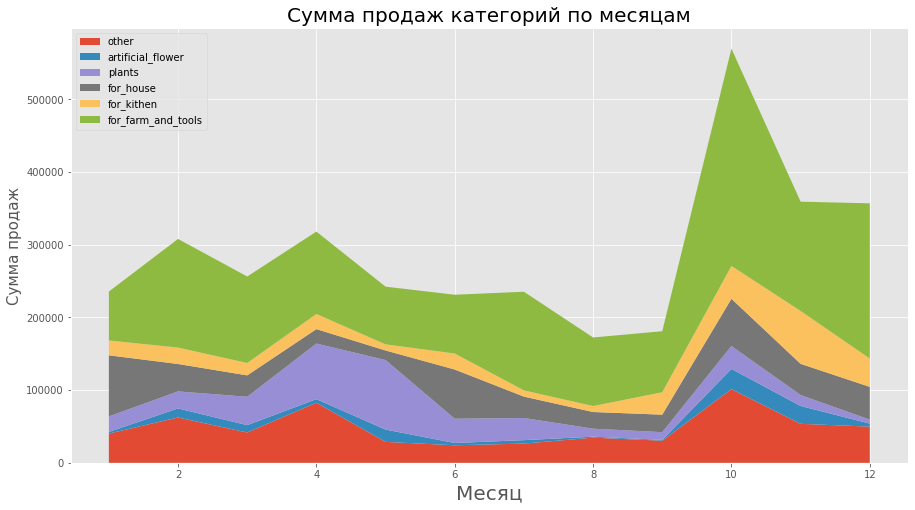

In [52]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.stackplot (group_price_time.month , group_price_time.other , group_price_time.artificial_flower , group_price_time.plants, 
              group_price_time.for_house, group_price_time.for_kithen, group_price_time.for_farm_and_tools,
              labels=['other', 'artificial_flower', 'plants',
       'for_house', 'for_kithen', 'for_farm_and_tools'])
#add legend

plt.legend(loc='upper left')
#add axis labels
plt.title('Сумма продаж категорий по месяцам', fontsize=20)
plt.xlabel('Месяц', fontsize=20)
plt.ylabel('Сумма продаж', fontsize = 15)

#display area chart
plt.show()



<b>Вывод:</b> Наиболее высокие месяца для продаж это:
 - Октябрь;
 - Декабрь;
 - Апрель;
 
 Больше всего продаж пришлось на категорию   "товары для хозяйства и стройки"  в декабре и октябре.
 
 Также с апреля по июнь наблюдается спрос на категорию "растения"
 

3. Построим диаграмму долей по продажам категорий.

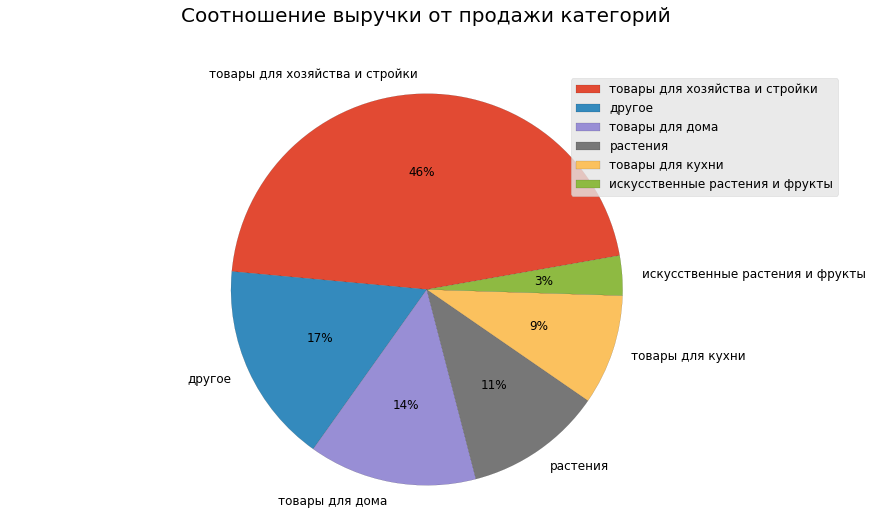

In [53]:
plt.style.use('ggplot')
data_x = group_price['revenue']
labels = group_price['category']
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15,8))
plt.pie(data_x, labels = labels,autopct='%.0f%%',   startangle=10, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0.1,
                      'antialiased': True})
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Соотношение выручки от продажи категорий', fontsize=20,pad=50);

<b>Вывод:</b> Самая высокопродаваемая категория это "товары для хозяйства и стройки", меньшая доля продаж приходит на "искуственные растения и фрукты"

4. Построим график с долей по продаж категорий по месяцам.

In [54]:
group_price_time.head()

,month,other,artificial_flower,plants,for_house,for_kithen,for_farm_and_tools
0,1,40200.0,2304.0,21361.0,84052.0,20437.0,67317.0
1,2,62335.0,12478.0,23411.0,37754.0,22584.0,149493.0
2,3,41689.0,10125.0,39073.0,29428.0,17058.0,118975.0
3,4,82641.0,4957.0,76485.0,19895.0,20825.0,113368.0
4,5,28806.0,16906.0,95658.0,13203.0,8441.0,79361.0


Изменим значения в ячейках на процентное соотношение от всего месяца на категорию

In [55]:
data_perc = group_price_time.divide(group_price_time.sum(axis=1), axis=0)*100

In [56]:
data_perc['month'] = [i for i in range(1,13)]

In [57]:
data_perc

,month,other,artificial_flower,plants,for_house,for_kithen,for_farm_and_tools
0,1,17.057605,0.977630,9.063868,35.664822,8.671798,28.563851
1,2,20.234892,4.050549,7.599568,12.255524,7.331111,48.527708
2,3,16.262468,3.949663,15.241992,11.479573,6.654158,46.410976
3,4,25.973442,1.557948,24.038658,6.252848,6.545140,35.630706
4,5,11.884644,6.974998,39.466128,5.447232,3.482548,32.742388
5,6,10.425639,1.363739,14.435134,29.275844,9.526280,34.970771
6,7,11.231135,2.011325,12.950637,12.504619,3.639074,57.660237
7,8,20.074108,0.763115,6.382683,13.304069,4.777589,54.693797
8,9,16.804259,0.583132,5.889304,13.306570,17.041156,46.370609
9,10,17.793935,4.875366,5.528058,11.407026,7.929509,52.464352


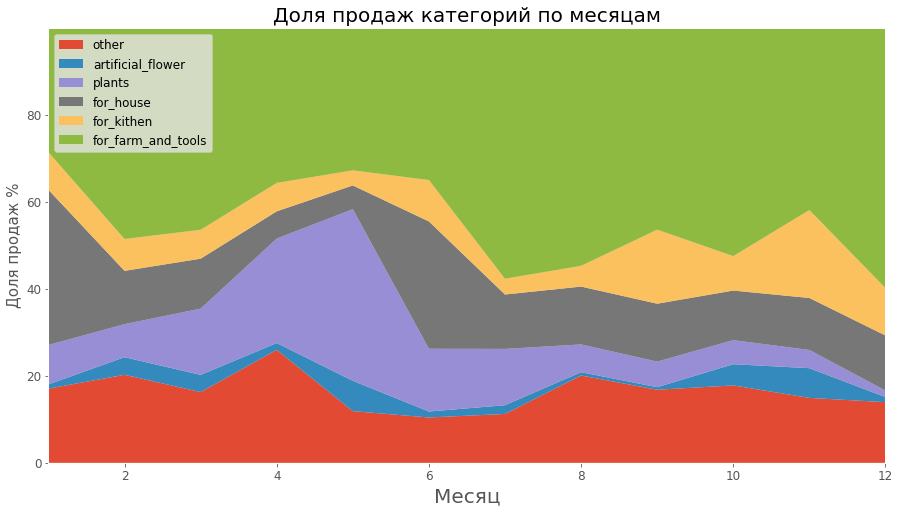

In [58]:
plt.figure(figsize=(15,8))
plt.stackplot(data_perc['month'],  data_perc["other"],  data_perc["artificial_flower"],  data_perc["plants"],
              data_perc["for_house"],data_perc["for_kithen"],data_perc["for_farm_and_tools"],
              labels=['other', 'artificial_flower', 'plants',
       'for_house', 'for_kithen', 'for_farm_and_tools'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Доля продаж категорий по месяцам', fontsize=20)
plt.xlabel('Месяц', fontsize=20)
plt.ylabel('Доля продаж %', fontsize = 15)
plt.show()

<b>Вывод:</b>
В период с апреля по июнь значимаю долю продаж занимает категория "растения". "Товары для кухни" растут в продажах с сентября.
"Товары для хозяйства и стройки" занимают большую долю продаж с июня.

5. Построим график значения среднего чека  категорий по месяцам.

In [59]:
group_aov_time = data.pivot_table(index = 'month', columns = 'category', values = 'revenue', aggfunc = 'mean').reset_index()

In [60]:
group_aov_time.columns = ['month', 'other', 'artificial_flower', 'plants',
       'for_house', 'for_kithen', 'for_farm_and_tools']

In [61]:
group_aov_time.head()

,month,other,artificial_flower,plants,for_house,for_kithen,for_farm_and_tools
0,1,1005.000000,209.454545,647.303030,3362.080000,851.541667,1270.132075
1,2,1074.741379,445.642857,182.898438,1348.357143,1075.428571,1494.930000
2,3,521.112500,440.217391,194.393035,1548.842105,741.652174,1652.430556
3,4,995.674699,150.212121,168.098901,865.000000,1601.923077,1619.542857
4,5,342.928571,2415.142857,165.498270,1200.272727,937.888889,1653.354167


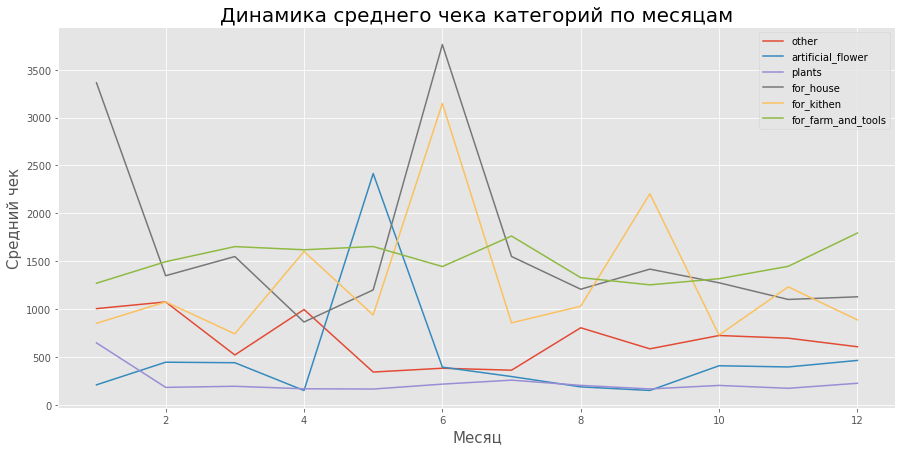

In [62]:
with plt.style.context('ggplot'):
    group_aov_time.plot(x ='month',grid=True, figsize=(15, 7));
    plt.title('Динамика среднего чека категорий по месяцам', fontsize=20)
    plt.xlabel('Месяц' , fontsize = 15)
    plt.ylabel('Средний чек', fontsize = 15)

<b>Вывод:</b>
На протяжении всего года, средний чек остается неизменным у категорий "Растения". В мае растет средний чек на категорию"искуственные фрукты и растения", это может быть связано с наступлением погоды, в которую люди начинают ходить на кладбища. 
Выше всего средний чек у категории "товары для дома" и "товары для кухни" в июне.

6. Проверим зависимость самой поппулярной категории и кол-ва покупок/сумме чека

In [63]:
data_for_farm = data.query('category == "товары для хозяйства и стройки" and quantity < 1000 ')

In [64]:
data_for_farm.sort_values(by = 'quantity', ascending = False).head()

,date,customer_id,order_id,product,quantity,price,month,revenue,key_word,category
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0,12,5800.0,ручка-скоба,товары для хозяйства и стройки
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",150,38.0,10,5700.0,пружина,товары для хозяйства и стройки
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0,10,2850.0,крепеж,товары для хозяйства и стройки
6535,2019-10-07 11:00:00,d933280e-5372-448f-be44-b269c8bafc2a,72885,"Крепеж для пружины дверной оцинкованный, 1107054",100,19.0,10,1900.0,крепеж,товары для хозяйства и стройки
6707,2019-10-28 10:00:00,018fb729-3525-4314-8e4d-1982b1062f9f,73110,"Шпингалет 80 мм белый с пружиной, 1102188",100,44.0,10,4400.0,шпингалет,товары для хозяйства и стройки


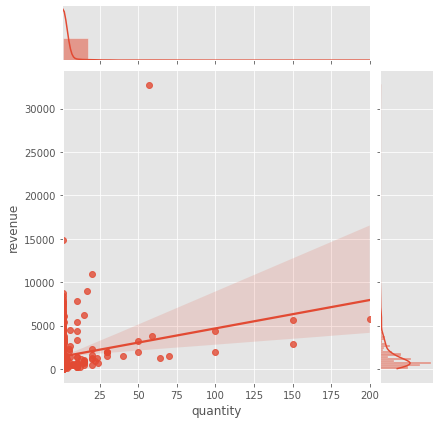

In [65]:
with plt.style.context('ggplot'):
    sns.jointplot(x='quantity', y='revenue', data=data_for_farm, kind='reg');

In [66]:
print('Корреляция составляет:')
print(round(data_for_farm['quantity'].corr(data_for_farm['revenue']),2))

Корреляция составляет:
0.2


<b>Вывод:</b>
Корреляция между выручкой и кол-вом товаров в заказе составляет 0.2  Это низкий уровень, который показывает невысокую зависимость.

<h2>Выделение основных и дополнительных категорий</h2>

In [67]:
data_top_revenue = data.groupby('product').agg({'revenue':'sum'}).sort_values(by = 'revenue',ascending = False)

In [68]:
data_top_revenue['ratio_revenue'] =  round(data_top_revenue['revenue']/data_top_revenue['revenue'].sum(),4)*100

In [69]:
data_top_revenue['cumsum_percente'] = data_top_revenue['ratio_revenue'].cumsum()

In [70]:
data_top_revenue.head()

,revenue,ratio_revenue,cumsum_percente
product,,,
Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,53232.0,1.54,1.54
Сумка-тележка 2-х колесная Gimi Argo синяя,50405.0,1.45,2.99
Вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0,1.43,4.42
Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ,33992.0,0.98,5.40
Муляж ЯБЛОКО 9 см красное,32702.0,0.94,6.34


Создадим функцию, которая присваивает класс товару, в зависимости от его доли в общей выручке

In [71]:
def abc_category(x):
    if x < 80:
        return 'A'
    elif x > 80 and x < 95:
        return 'B'
    else:
        return 'C'

In [72]:
data_top_revenue['class'] = data_top_revenue['cumsum_percente'].apply(abc_category)

In [73]:
data_top_revenue

,revenue,ratio_revenue,cumsum_percente,class
product,,,,
Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,53232.0,1.54,1.54,A
Сумка-тележка 2-х колесная Gimi Argo синяя,50405.0,1.45,2.99,A
Вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0,1.43,4.42,A
Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ,33992.0,0.98,5.40,A
Муляж ЯБЛОКО 9 см красное,32702.0,0.94,6.34,A
...,...,...,...,...
"Цинния Оранжевый король 0,5 г 4660010770520",10.0,0.00,99.38,C
"Цинния Коралловая красавица 0,2 г 4660010773323",10.0,0.00,99.38,C
"Незабудка смесь 0,1 г 4650091480340",10.0,0.00,99.38,C


Таким образом мы распределили продукцию на основные и дополнительнве категории:
   - Категория 'A' это товары, которые составляют 80% дохода магазина. Их относим к категории основные; 
   - Категория 'B' это товары, которые составляют остальные 15% дохода магазина. Их относим к категории основные, либо дополнительные;
   - Категория 'C' это товары, которые составляют остальные 5% дохода магазина. Их относим к категории  дополнительные; 

<h2> Формулировка гипотез</h2>

1. Формулируем две гипотезы, а также альтернативные к ним.

H0: Средний чек категории которая принесла больше всего выручки (товары для хозяйства и стройки) = среднему чек категори, которая принесла меньше всего выручки(искусственные растения и фрукты).

H1: Средний чек категории которая принесла больше всего выручки (товары для хозяйства и стройки) ≠ среднему чек категори, которая принесла меньше всего выручки(искусственные растения и фрукты).

2. Определимя с критерием для проверки гипотез. (Исходя из размера выборки, независимости и т.д)

Для это нам нужно ответить на следующие вопросы:
   - Какой тип данных (количественный или качественный);
   - Подлежат ли данные закону нормального паспределения;
   - Являются ли группы независимыми и сколько их;
    

Нам известно, что тип переменных у нас количественный,
посмотрим на их распределение:

In [74]:
for_farm_sample = data.query("category == 'товары для хозяйства и стройки' ")['price']

In [75]:
artificial_flower_sample = data.query("category == 'искусственные растения и фрукты' ")['price']

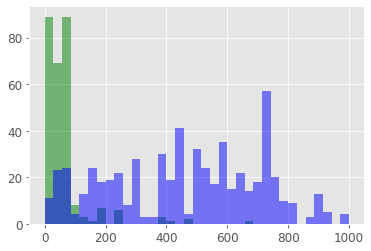

In [76]:
artificial_flower_sample.hist(bins=35, alpha=0.5, color='green',range =(0,1000))
for_farm_sample.hist(bins=35, alpha=0.5, color='blue',range =(0,1000));

Одна из выборок имеет характерные черты нормального распределения. Также, группы независимы, поэтому мы будем использывать <b>двухвыборочный t-критерий.</b>

In [77]:
results = st.ttest_ind(for_farm_sample,artificial_flower_sample, equal_var = False)

alpha = 0.05

print(results.pvalue)
# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом

5.5013672365125734e-130
Отвергаем нулевую гипотезу


<b>Делаем вывод, что:</b> Нам не получилось доказать нулевую гипотезу.

Формулируем вторую гипотезу:

H0: Среднее число покупок категории которая принесла больше всего выручки (товары для хозяйства и стройки) = Среднему числу покупок категории "растения".

H1: Среднее число покупок категории которая принесла больше всего выручки (товары для хозяйства и стройки) ≠ Среднему числу покупок категории "растения".

In [78]:
for_farm_sample2 = data.query("category == 'товары для хозяйства и стройки' ")['quantity']

In [79]:
plants_sample2 = data.query("category == 'растения' ")['quantity']

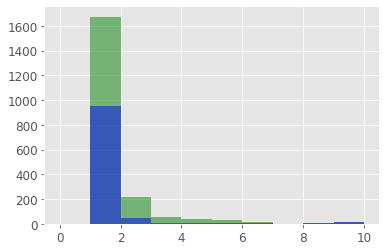

In [80]:
plants_sample2.hist(bins=10, alpha=0.5, color='green',range =(0,10))
for_farm_sample2.hist(bins=10, alpha=0.5, color='blue',range =(0,10));

In [81]:
results = st.ttest_ind(for_farm_sample2,plants_sample2, equal_var = False)

alpha = 0.05

print(results.pvalue)
# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом

0.001447850801334532
Отвергаем нулевую гипотезу


<b>Делаем вывод, что:</b> Средние чеки данных категорий не равны.

<h2>  Заключительный вывод </h2>

Проведя категорийный анализ мы выявили, что самые прибыльные месяцы для интернет магазина это:
   - Июнь: Больше всего спроса на категорию "товары для хозяйства и стройки" и "растения";
   - Октябоб: Больше всего спроса на категорию "товары для хозяйства и стройки" и "другое";
   
   
Самая прибыльная категория за весь период исследования:
   - Товары для хозяйства и стройки: Суммарная выручка <b>2 567 907 у.е</b>;
   
Наименее прибыльная категория за весь период исследования:
   - Искусственные растения и фрукты: Суммарная выручка <b>120 682 у.е</b>;
   
Остальные категории занимают примерно одинаковую долю по выручкам:
   - Растения - 12%;
   - Другое - 14%;
   - Товары для дома - 11%;
   - Товары для кухни - 7%;
   
Наиболее прибыльные периоды для категорий:
   - Товары для хозяйства и стройки: C июня по октябрь и декабрь;
   - Искусственные растения и фрукты: май и ноябрь;
   - Растения: C марта по июнь;
   - Другое: C февраля по апрель, октябрь;
   - Товары для дома: январь, июль - октябрь;
   - Товары для кухни: C сентября по ноябрь;

<b>Общие реккомендации</b>

1. Категория "Искусственные растения и фрукты" имеет более низкий средний чек, чем лидирующие категории. Также данная продукция приносит лишь 2% от общего дохода. Исходя из маржинальности товара, реккомендуем увеличить стоимость товара либо убрать его из продажи.

2. Категория "Товары для хозяйства и стройки" приносит большую долю продаж из всех категорий. Возможно стоит расширить продуктовый ассортимент данной категории, так как емкость спроса позволяет это сделать.

3. Категория "Растения" имеет большее кол-во покупок чем  "Товары для хозяйства и стройки" в 2,5 раза. Но из-за низкого чека, выручка этой категории занчительно ниже. Стоит прорабоать кросс-сейлы и тем самым увеличить средний чек при покупки растений.

4. Выставить приоритет у товаров по категориями A-B-C: 
   - Категория 'A' это товары, которые составляют 80% дохода магазина. Их относим к категории основные; 
   - Категория 'B' это товары, которые составляют остальные 15% дохода магазина. Их относим к категории основные, либо дополнительные;
   - Категория 'C' это товары, которые составляют остальные 5% дохода магазина. Их относим к категории  дополнительные; 

Презентация: https://disk.yandex.ru/i/gZa4ZDvgeP9NaQ